# Problem Statment
* Many people face difficulty in knowing the fair price of a laptop based on its features. Using a dataset of laptops with features like company, type, screen size, CPU, RAM, storage, GPU, operating system, and weight, the goal is to predict the price of a laptop. This will help users check the estimated price for a specific configuration before buying, which can be used to build a website or tool for price estimation

In [117]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df=pd.read_csv('laptop_data.csv')

In [119]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [120]:
df=df.drop('Unnamed: 0',axis=1)

In [121]:
df.shape

(1303, 11)

In [122]:
# limitation data 

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [124]:
# Convert Ram to numeric (remove 'GB')
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)

# Convert Weight to numeric (remove 'kg')
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)


In [125]:
df.duplicated().sum()

np.int64(29)

In [126]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Domain Analysis
* This dataset contains information about laptops, including brand, type, screen size, resolution, CPU, RAM, storage, GPU, operating system, weight, and price. Laptop prices vary based on these features, with premium brands and higher specifications costing more. Users often face difficulty in knowing the fair price for a specific configuration. The goal is to predict laptop prices so users can check the estimated price before buying

# EDA  

###  1. Univariate Analysis

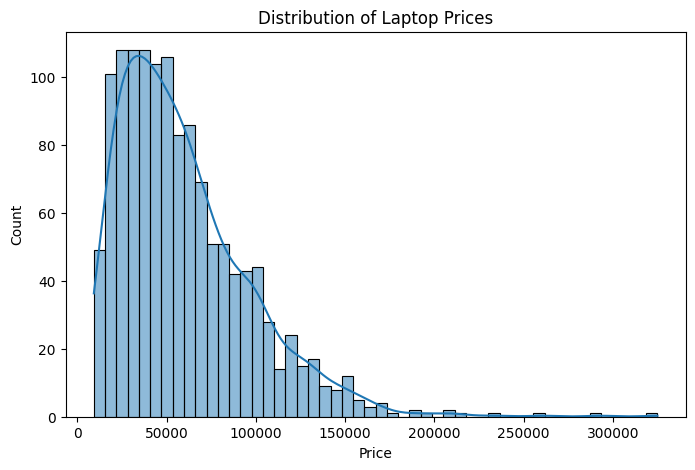

In [127]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

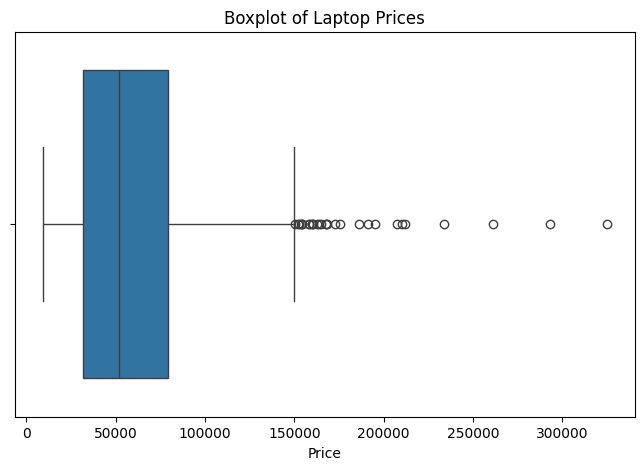

In [128]:
# Boxplot for price (to see outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Laptop Prices')
plt.show()

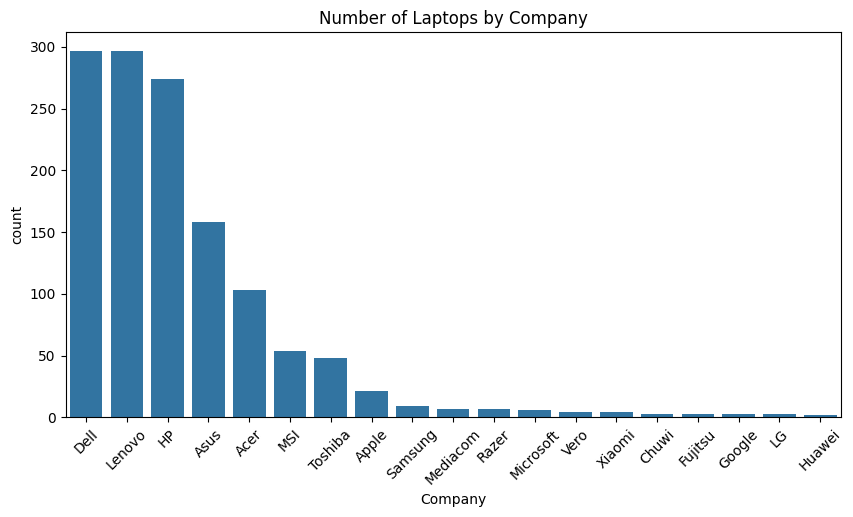

In [129]:
# Count of laptops by Company
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.title('Number of Laptops by Company')
plt.xticks(rotation=45)
plt.show()

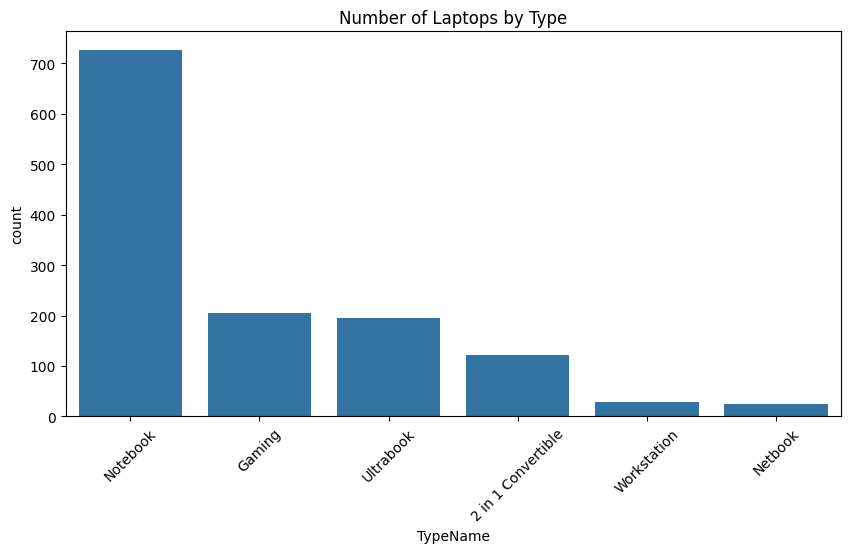

In [130]:
# Count of laptops by TypeName
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='TypeName', order=df['TypeName'].value_counts().index)
plt.title('Number of Laptops by Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_27060\4242580980.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'], bins=10, kde=True)


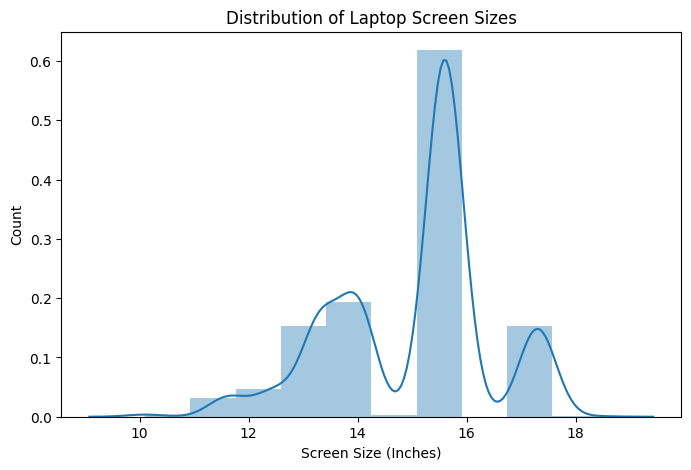

In [131]:
# Histogram for laptop screen size (Inches)
plt.figure(figsize=(8,5))
sns.distplot(df['Inches'], bins=10, kde=True)
plt.title('Distribution of Laptop Screen Sizes')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Count')
plt.show()

### 2. Bivariate Analysis

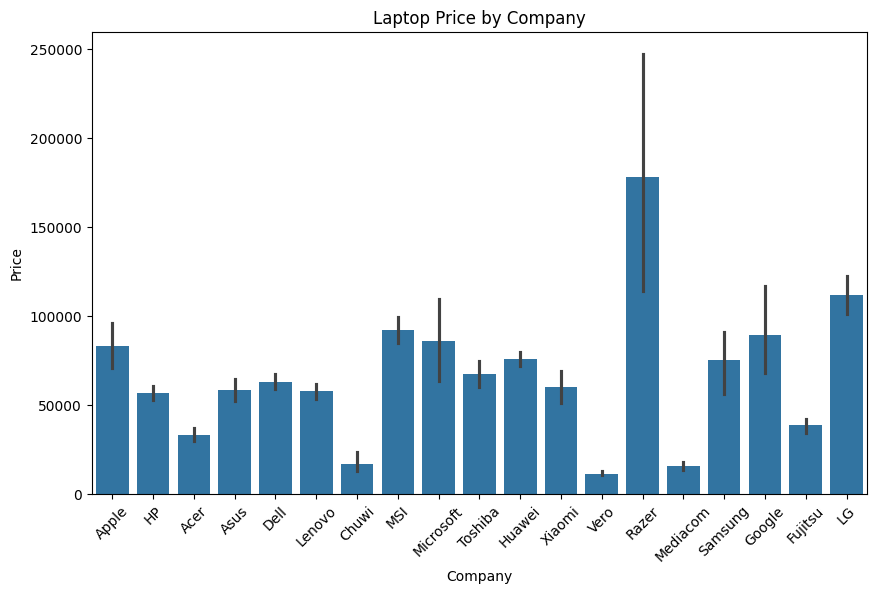

In [132]:
# Price vs Company
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Company', y='Price')
plt.title('Laptop Price by Company')
plt.xticks(rotation=45)
plt.show()

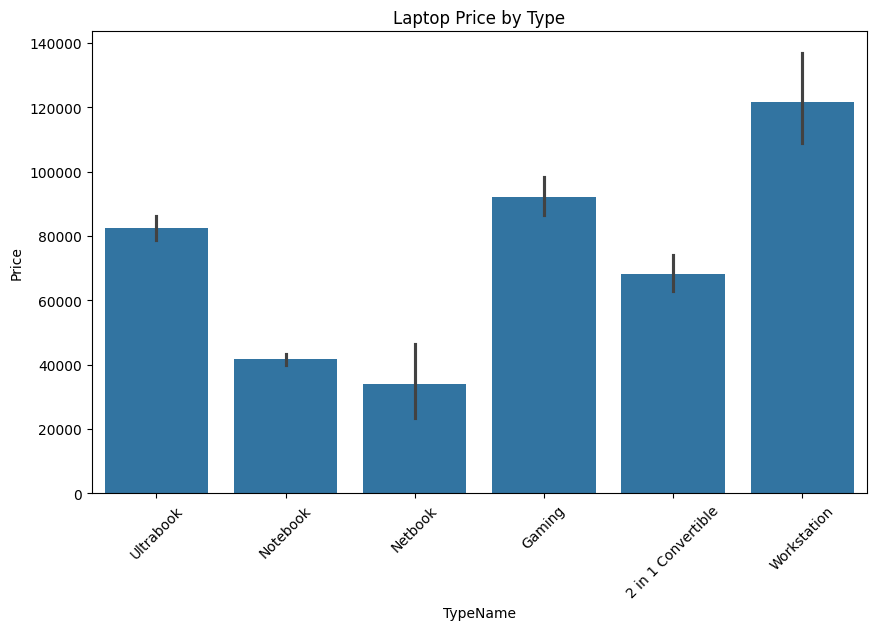

In [133]:
# Price vs TypeName
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='TypeName', y='Price')
plt.title('Laptop Price by Type')
plt.xticks(rotation=45)
plt.show()

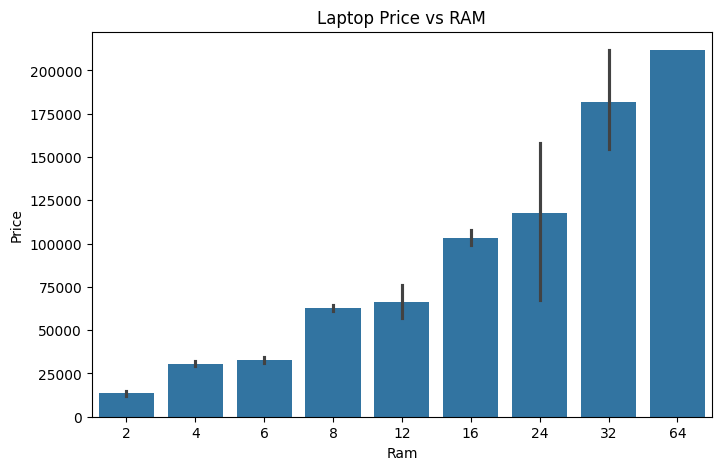

In [134]:
# Price vs RAM
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Ram', y='Price')
plt.title('Laptop Price vs RAM')
plt.show()

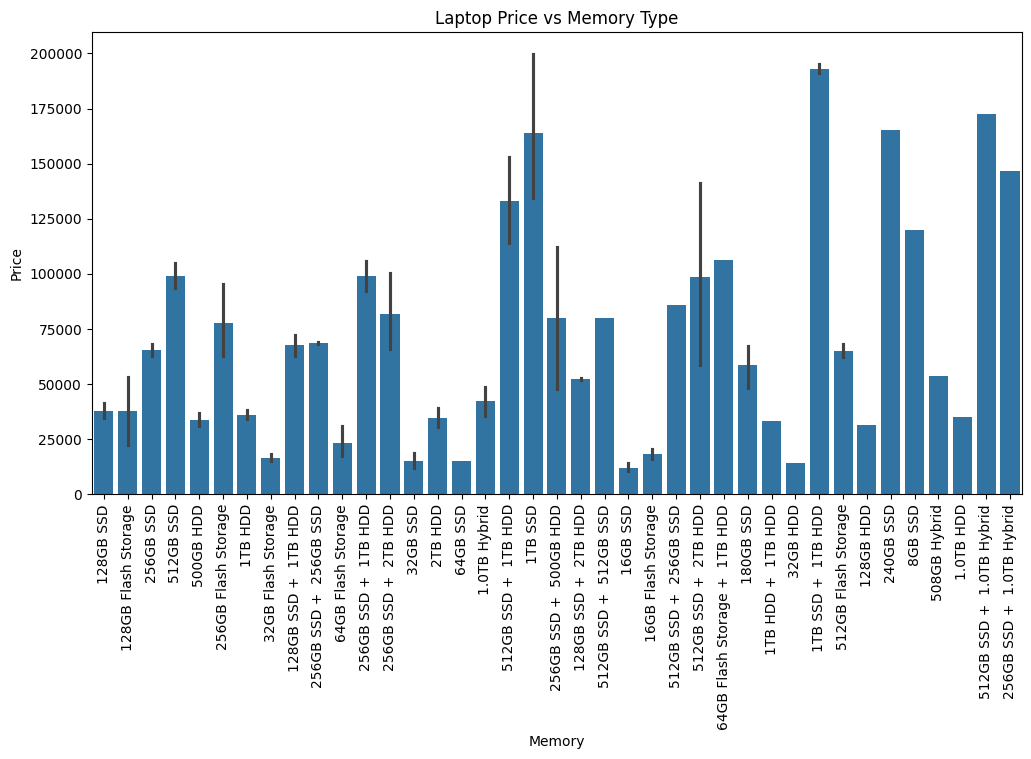

In [135]:
# Price vs Memory type
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Memory', y='Price')
plt.title('Laptop Price vs Memory Type')
plt.xticks(rotation=90)
plt.show()

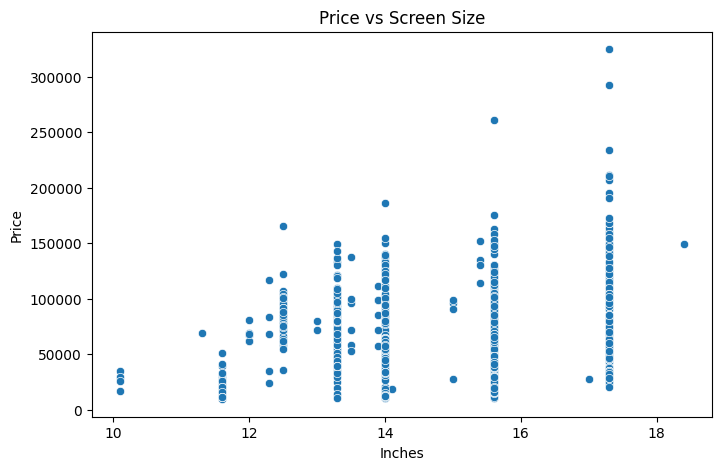

In [136]:
# Price vs Inches (screen size)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Inches', y='Price')
plt.title('Price vs Screen Size')
plt.show()

### 3. Multivariate Analysis

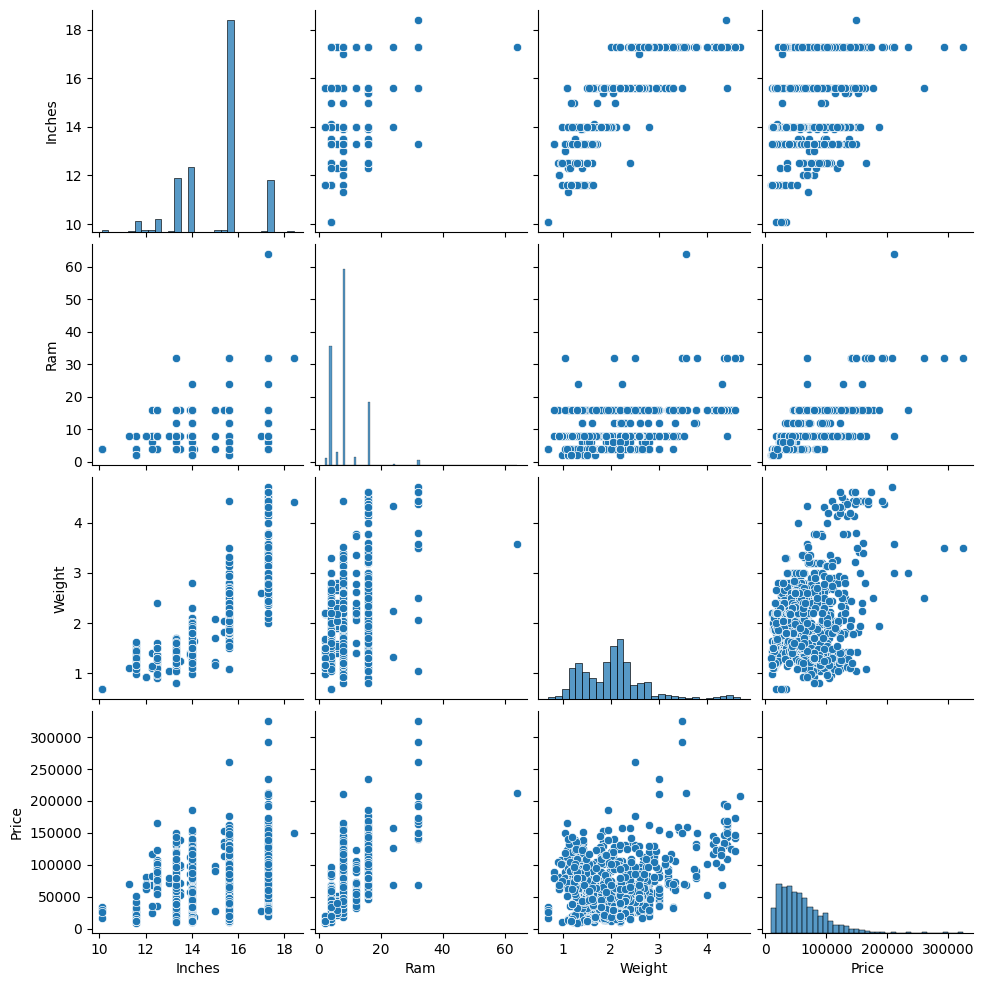

In [137]:
# Pairplot of numeric features
numeric_cols = ['Inches','Ram','Weight','Price']
sns.pairplot(df[numeric_cols])
plt.show()


### Insight
* Apple laptops are generally priced higher than other brands for similar configurations.

* Laptops with higher RAM, better CPUs, larger storage, or dedicated GPUs tend to have higher prices.

* Screen size, resolution, and weight also influence laptop price, with larger or premium displays increasing cost.

* Price varies widely across brands and types, showing that multiple factors affect the fair value of a laptop.

# Data Preprocessing AND Feature Engineering

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [139]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [140]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [141]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [142]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1117,Razer,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.25,54825.12,1
204,Dell,Workstation,15.6,4K Ultra HD 3840x2160,Intel Xeon E3-1505M V6 3GHz,16,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows 10,2.80,162770.40,0
379,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,45074.88,0
1228,Lenovo,Gaming,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,54825.12,1
325,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,15557.76,0


<Axes: xlabel='Touchscreen', ylabel='Price'>

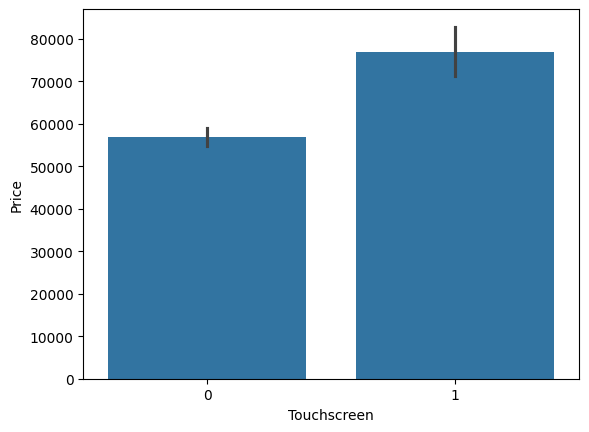

In [143]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [144]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [145]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips', ylabel='Price'>

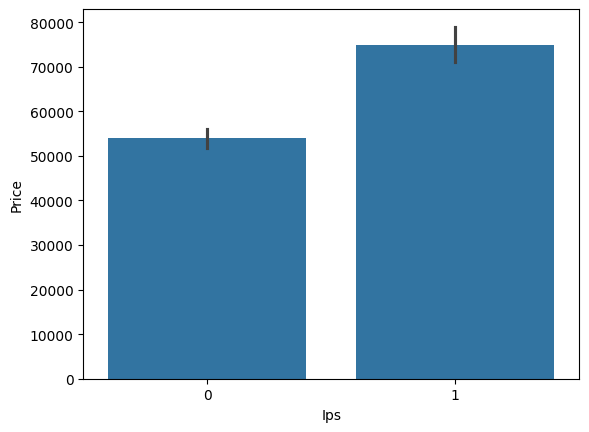

In [146]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [147]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [148]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [149]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [150]:
# Resolution
df['X_res']= df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])


In [151]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [152]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [154]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [155]:
# I am creating a new feature called PPI (Pixels Per Inch) by combining screen resolution
# and size to better understand how screen quality affects laptop price
df['ppi']=(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [156]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [157]:
# drop ScreenResolution
df.drop(columns=['ScreenResolution'],inplace=True)

In [158]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670


In [159]:
# drop Inches,X_res and Y_res
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)


In [160]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [161]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [162]:
df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [163]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [164]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [165]:
df['Cpu brand']=df['Cpu_Name'].apply(fetch_processor)

In [166]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

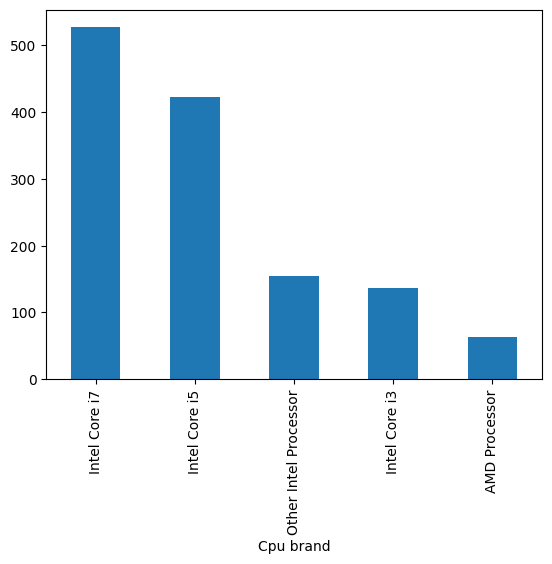

In [167]:
df['Cpu brand'].value_counts().plot(kind='bar')

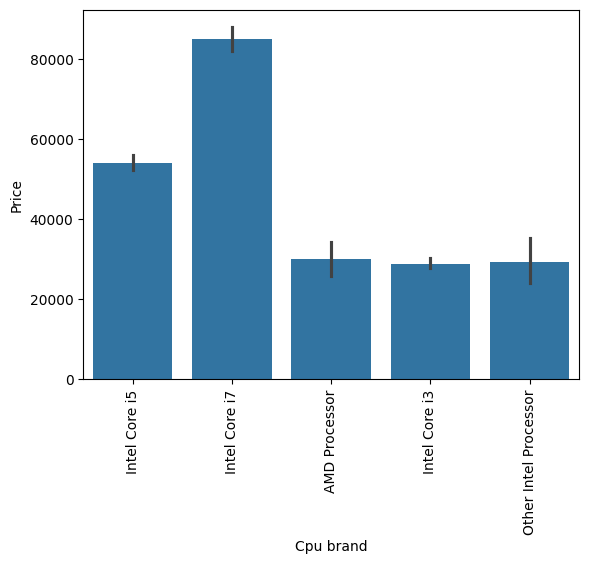

In [168]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [169]:
# Drop Cpu_Name and Cpu
df.drop(columns=['Cpu_Name','Cpu'],inplace=True)


In [170]:
# df.head()

<Axes: xlabel='Ram'>

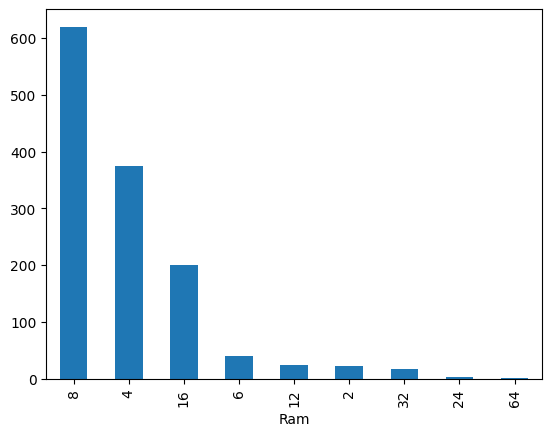

In [171]:
# Ram column
df['Ram'].value_counts().plot(kind='bar')

In [172]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [173]:
# Convert Memory column to string and clean it
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

# Split into two parts if "+" is present
new = df['Memory'].str.split("+", n=1, expand=True)

df['first'] = new[0].str.strip()
df['second'] = new[1].str.strip()

# Layer 1 (first part)
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only numbers from first part
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Fill NaN in second part with "0"
df["second"].fillna("0", inplace=True)

# Layer 2 (second part)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract only numbers from second part
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Replace empty string with 0
df['first'] = df['first'].replace('', 0).astype(int)
df['second'] = df['second'].replace('', 0).astype(int)

# Final columns for each type
df["HDD"] = (df["first"]*df["Layer1HDD"] + df["second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"] + df["second"]*df["Layer2SSD"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"] + df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"]*df["Layer1Flash_Storage"] + df["second"]*df["Layer2Flash_Storage"])

# Drop temporary columns
df.drop(columns=["first","second","Layer1HDD","Layer1SSD","Layer1Hybrid","Layer1Flash_Storage",
                 "Layer2HDD","Layer2SSD","Layer2Hybrid","Layer2Flash_Storage"], inplace=True)


C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_27060\2506482879.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace=True)


In [174]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
108,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210.7200,0,0,141.211998,Intel Core i7,1000,256,0,0
490,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.30,53918.8272,0,1,141.211998,Intel Core i5,0,256,0,0
1104,Lenovo,Gaming,16,512 SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,63882.7200,0,0,141.211998,Intel Core i7,0,512,0,0
789,Dell,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.62,52480.8000,0,0,141.211998,Intel Core i5,0,256,0,0
1084,Dell,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.18,39960.0000,0,0,141.211998,Intel Core i5,0,256,0,0


In [175]:
df.drop(columns=['Memory'],inplace=True)

In [176]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [177]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [178]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [179]:
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0


In [180]:
# Gpu column
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [181]:
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [182]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [183]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [184]:
df=df[df['Gpu brand'] !='ARM']

In [185]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

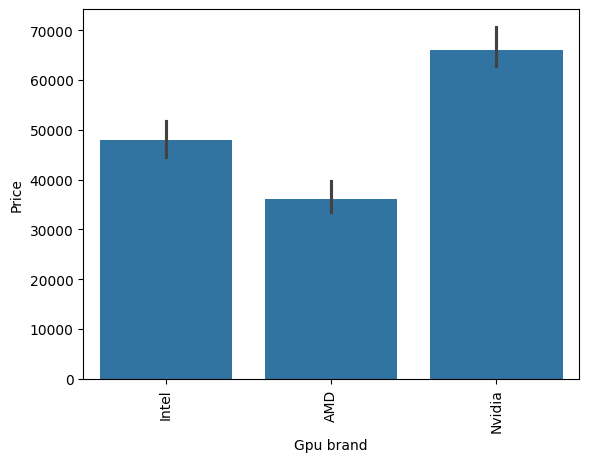

In [186]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation=90)
plt.show()

In [187]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_27060\1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [188]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [189]:
# Opsys column
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

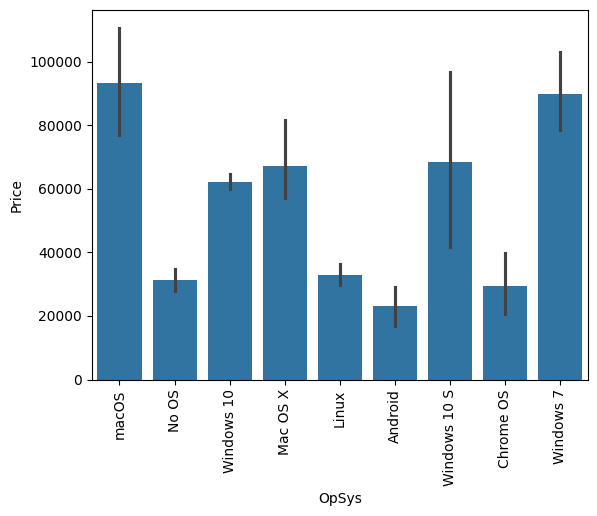

In [190]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [191]:
def cat_os(i):
    if i == 'Windows 10' or i== 'Windows 7' or i== 'Windows 10 s':
        return 'windows'
    elif i=='macOS' or i== 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [192]:
df['os']=df['OpSys'].apply(cat_os)

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_27060\3255695950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os']=df['OpSys'].apply(cat_os)


In [193]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [194]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_27060\3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


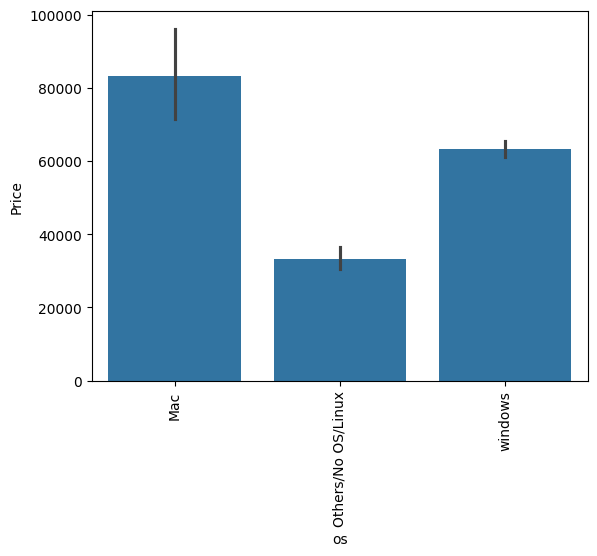

In [195]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

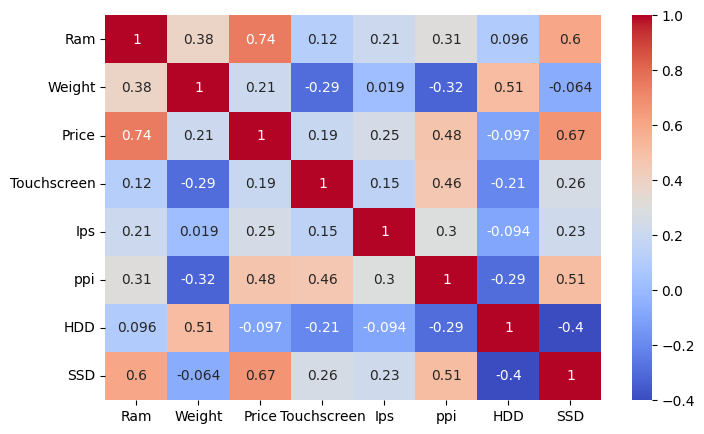

In [196]:
# heatmap Correlation matrix only for numeric columns
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_27060\306738279.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

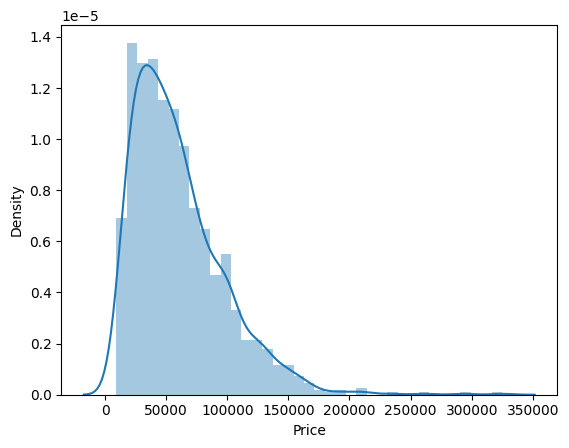

In [197]:
# Target column
sns.distplot(df['Price'])

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_27060\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

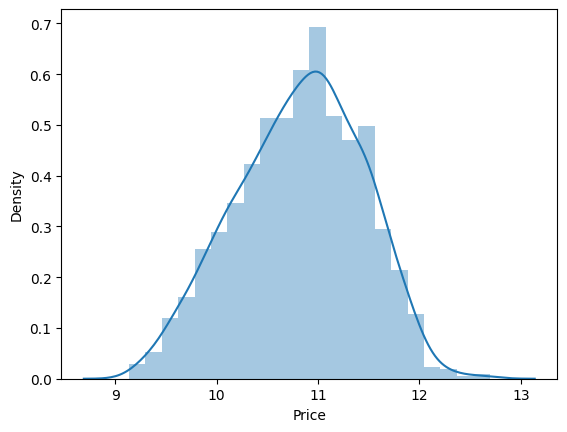

In [198]:
sns.distplot(np.log(df['Price']))

### Split data into X and Y

In [199]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [200]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [201]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

### Train-test split


In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [203]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
945,Lenovo,Gaming,16,2.50,0,1,141.211998,AMD Processor,1000,512,AMD,windows
428,HP,Gaming,12,3.35,0,0,127.335675,Intel Core i7,1000,256,Nvidia,windows
1261,Asus,Ultrabook,8,1.20,0,1,165.632118,Other Intel Processor,0,512,Intel,windows
174,HP,Notebook,8,2.50,0,0,127.335675,Intel Core i5,0,256,Nvidia,windows
398,Dell,Workstation,8,1.78,1,0,282.423996,Intel Core i7,0,256,Nvidia,windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia,windows
1130,HP,Notebook,8,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel,windows
1295,Dell,Notebook,8,2.30,0,0,100.454670,Intel Core i7,1000,0,AMD,Others/No OS/Linux
860,Lenovo,Notebook,8,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel,windows


In [204]:
# df = pd.get_dummies(df, columns=['Company','TypeName','Cpu brand','Gpu brand','os'], drop_first=True)

In [205]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [206]:
# Linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Tree-based models
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

# Ensemble models
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
    StackingRegressor,
    VotingRegressor
)

# Support Vector Regressor
from sklearn.svm import SVR

# XGBoost
from xgboost import XGBRegressor


# Linear Regression

In [207]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=LinearRegression()
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.7921445741965716
MAE 0.21390925463479532


In [208]:
np.exp(0.21)

np.float64(1.2336780599567432)

# Ridge Regression

In [209]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=Ridge(alpha=10)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.782191076829776
MAE 0.22183888329092338


# Lasso Regression

In [210]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=Lasso(alpha=0.001)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7870429662105374
MAE 0.21868324213561263


# KNN

In [211]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=4)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7616923384511013
MAE 0.22444569031456113


# Decision Tree 

In [212]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8122291589594959
MAE 0.19795745386119334


# SVM

In [213]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8121728320135887
MAE 0.19347823307076928


# Random Forest

In [214]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                           random_state=3,
                           max_samples=0.5,
                           max_features=.75,
                           max_depth=15)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8471673230855747
MAE 0.1742980962592258


In [215]:
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Preprocessing
# -------------------------
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

# -------------------------
# Step 2: RandomForest Model
# -------------------------
step2 = RandomForestRegressor(random_state=42)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# -------------------------
# Hyperparameter grid
# -------------------------
param_grid = {
    'step2__n_estimators': [100, 200, 300],
    'step2__max_depth': [15, 20],
    'step2__min_samples_split': [2, 5, 10],
    'step2__min_samples_leaf': [1, 2, 4],
    'step2__max_features': [0.75, 0.8, 'sqrt'],
    'step2__max_samples': [0.5, 0.6, 0.7]
}

# -------------------------
# RandomizedSearchCV for fast tuning
# -------------------------
rand_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=50,        # 50 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# -------------------------
# Fit model
# -------------------------
rand_search.fit(X_train, y_train)

# -------------------------
# Best hyperparameters & R2
# -------------------------
print("Best Hyperparameters:", rand_search.best_params_)
print("Best CV R2 Score:", rand_search.best_score_)

# -------------------------
# Predictions on test set
# -------------------------
y_pred = rand_search.predict(X_test)
print("Test R2 score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'step2__n_estimators': 300, 'step2__min_samples_split': 2, 'step2__min_samples_leaf': 1, 'step2__max_samples': 0.6, 'step2__max_features': 0.75, 'step2__max_depth': 20}
Best CV R2 Score: 0.878987670764465
Test R2 score: 0.8521657280306341
Test MAE: 0.17028849701052617


# ExtraTrees

In [216]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15,
    bootstrap=True  
)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8395977520968292
MAE 0.17908793680044785


# ADAbOOST

In [217]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7457727739323758
MAE 0.2523281444898717


In [218]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8042639268465024
MAE 0.2085138222762213


In [219]:
from sklearn.model_selection import RandomizedSearchCV
# -------------------------
# Step 1: Preprocessing
# -------------------------
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

# -------------------------
# Step 2: AdaBoost Regressor
# -------------------------
step2 = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(),  
    n_estimators=50,        # initial
    learning_rate=1.0,      # initial
    random_state=42
)

# -------------------------
# Pipeline
# -------------------------
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# -------------------------
# Hyperparameter grid for RandomizedSearchCV
# -------------------------
param_grid = {
    'step2__n_estimators': [50, 100, 150],
    'step2__learning_rate': [0.1, 0.3, 0.5, 1.0],
    'step2__estimator__max_depth': [3, 5, 7]  
}

# -------------------------
# RandomizedSearchCV
# -------------------------
rand_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_grid,
    n_iter=20,      # number of random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# -------------------------
# Fit model
# -------------------------
rand_search.fit(X_train, y_train)

# -------------------------
# Best hyperparameters & R2
# -------------------------
print("Best Hyperparameters:", rand_search.best_params_)
print("Best CV R2 Score:", rand_search.best_score_)

# -------------------------
# Predictions on test set
# -------------------------
y_pred = rand_search.predict(X_test)
print("Test R2 score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'step2__n_estimators': 100, 'step2__learning_rate': 1.0, 'step2__estimator__max_depth': 7}
Best CV R2 Score: 0.8679727845525542
Test R2 score: 0.8469561280717695
Test MAE: 0.1797860135461755


# GradientBoost

In [220]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8582124346210616
MAE 0.16979979443458887


# XgBoost

In [221]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8753971121593364
MAE 0.1564332636710545


In [222]:
# # -------------------------
# # Step 1: Preprocessing
# # -------------------------
# step1 = ColumnTransformer(
#     transformers=[
#         ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
#     ],
#     remainder='passthrough'
# )

# # -------------------------
# # Step 2: XGBRegressor
# # -------------------------
# step2 = XGBRegressor(random_state=42)

# # -------------------------
# # Step 3: Pipeline
# # -------------------------
# pipe = Pipeline([
#     ('step1', step1),
#     ('step2', step2)
# ])

# # -------------------------
# # Step 4: Hyperparameter grid
# # -------------------------
# param_grid = {
#     'step2__n_estimators': [50, 100, 150, 200],
#     'step2__learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
#     'step2__max_depth': [3, 4, 5, 6],
#     'step2__subsample': [0.6, 0.8, 1.0],
#     'step2__colsample_bytree': [0.6, 0.8, 1.0],
#     'step2__gamma': [0, 0.1, 0.2],
#     'step2__reg_alpha': [0, 0.01, 0.1],
#     'step2__reg_lambda': [1, 1.5, 2]
# }

# # -------------------------
# # Step 5: RandomizedSearchCV
# # -------------------------
# rand_search = RandomizedSearchCV(
#     estimator=pipe,
#     param_distributions=param_grid,
#     n_iter=50,       # 50 random combinations
#     cv=5,            # 5-fold cross-validation
#     scoring='r2',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# # -------------------------
# # Step 6: Fit model
# # -------------------------
# rand_search.fit(X_train, y_train)

# # -------------------------
# Step 7: Best hyperparameters & CV R2
# # -------------------------
# print("Best Hyperparameters:", rand_search.best_params_)
# print("Best CV R2 Score:", rand_search.best_score_)

# # -------------------------
# # Step 8: Predictions on test set
# # -------------------------
# y_pred = rand_search.predict(X_test)
# print("Test R2 score:", r2_score(y_test, y_pred))
# print("Test MAE:", mean_absolute_error(y_test, y_pred))


# Voting Regressor

In [223]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, VotingRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import r2_score, mean_absolute_error

# # -------------------------
# # Step 1: Preprocessing
# # -------------------------
# step1 = ColumnTransformer(
    # transformers=[
#         ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
#     ],
#     remainder='passthrough'
# )

# # -------------------------
# # Step 2: Define individual models
# # -------------------------
# models = []

# # Linear Regression
# lr_pipe = Pipeline([
#     ('step1', step1),
#     ('model', LinearRegression())
# ])
# models.append(('lr', lr_pipe))


# # Random Forest
# rf_pipe = Pipeline([
#     ('step1', step1),
#     ('model', RandomForestRegressor(
#         n_estimators=200,
#         max_depth=20,
#         min_samples_split=2,
#         min_samples_leaf=1,
#         max_features=0.75,
#         max_samples=0.6,
#         random_state=42
#     ))
# ])
# models.append(('rf', rf_pipe))

# # Extra Trees
# et_pipe = Pipeline([
#     ('step1', step1),
#     ('model', ExtraTreesRegressor(
#         n_estimators=100,
#         max_depth=15,
#         max_features=0.75,
#         max_samples=0.5,
#         bootstrap=True,
#         random_state=3
#     ))
# ])
# models.append(('et', et_pipe))

# Gradient Boosting
# gb_pipe = Pipeline([
#     ('step1', step1),
#     ('model', GradientBoostingRegressor(n_estimators=500))
# ])
# models.append(('gb', gb_pipe))

# # XGBoost
# xgb_pipe = Pipeline([
#     ('step1', step1),
#     ('model', XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5))
# ])
# models.append(('xgb', xgb_pipe))

# # -------------------------
# # Step 3: Voting Regressor
# # -------------------------
# voting_reg = VotingRegressor(estimators=models)

# # -------------------------
# # Step 4: Fit Voting Regressor
# # -------------------------
# voting_reg.fit(X_train, y_train)

# # -------------------------
# # Step 5: Predictions & Evaluation
# # -------------------------
# y_pred = voting_reg.predict(X_test)

# print("Voting Regressor R2 score:", r2_score(y_test, y_pred))
# print("Voting Regressor MAE:", mean_absolute_error(y_test, y_pred))


In [224]:
# -------------------------
# Step 1: Preprocessing
# -------------------------
step1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
    ],
    remainder='passthrough'
)

# -------------------------

# -------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.75,
    max_samples=0.6,
    random_state=42
)

et = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=15,
    max_features=0.75,
    max_samples=0.5,
    bootstrap=True,
    random_state=3
)

gb = GradientBoostingRegressor(n_estimators=500)

xgb = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

# -------------------------
# Step 3: Voting Regressor (weights adjusted)
# -------------------------
step2 = VotingRegressor(
    estimators=[
        ('rf', rf),
        ('et', et),
        ('gb', gb),
        ('xgb', xgb)
    ],
    weights=[5, 1, 1, 1]  # RF ko zyada weight
)

# -------------------------
# Step 4: Complete Pipeline
# -------------------------
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# -------------------------
# Step 5: Fit Voting Regressor
# -------------------------
pipe.fit(X_train, y_train)

# -------------------------
# Step 6: Predictions & Evaluation
# -------------------------
y_pred = pipe.predict(X_test)

print("Voting Regressor R2 score:", r2_score(y_test, y_pred))
print("Voting Regressor MAE:", mean_absolute_error(y_test, y_pred))


Voting Regressor R2 score: 0.8645451420139516
Voting Regressor MAE: 0.16271185559963683


# Stacking

In [225]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

# -------------------------
# Step 1: Preprocessing
# -------------------------
step1 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
    ],
    remainder='passthrough'
)

# -------------------------
# Step 2: Base estimators
# -------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.75,
    max_samples=0.6,
    random_state=42
)

gb = GradientBoostingRegressor(n_estimators=500)

xgb = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

estimators = [
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
]

# -------------------------
# Step 3: Stacking Regressor
# -------------------------
step2 = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=100),
    n_jobs=-1
)

# -------------------------
# Step 4: Complete Pipeline
# -------------------------
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# -------------------------
# Step 5: Fit Stacking Regressor
# -------------------------
pipe.fit(X_train, y_train)

# -------------------------
# Step 6: Predictions & Evaluation
# -------------------------
y_pred = pipe.predict(X_test)

print("Stacking Regressor R2 score:", r2_score(y_test, y_pred))
print("Stacking Regressor MAE:", mean_absolute_error(y_test, y_pred))

 

Stacking Regressor R2 score: 0.8670930956880892
Stacking Regressor MAE: 0.16504472364350747


# Exporting the model

In [226]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [227]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,windows


In [228]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)


Numpy version: 2.2.6
Pandas version: 2.3.1
Matplotlib version: 3.10.3
Seaborn version: 0.13.2


In [230]:
# import xgboost
print(xgboost.__version__)

3.0.5
